<a href="https://colab.research.google.com/github/NismaK/ML-Knee-Osteoarthritis-Classification/blob/main/FeatureextractionusingXrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠📊 ML BASED AUTOMATIC CLASSIFICATION OF KNEE OSTEOARTHRITIS SEVERITY USING RADIOGRAPHIC IMAGES**

#### **🎯 Objective**

The main objective of this notebook is to develop and train a deep learning model using radiographic (X-ray) images to automatically classify the severity of Knee Osteoarthritis (KOA) based on the Kellgren–Lawrence (KL) grading system (0–4).

Specifically, this notebook focuses on:

💻 Preprocessing and augmenting radiographic image data (resize, normalize, enhance contrast)

🧠 Using a pre-trained deep learning model VGG-16 for feature extraction and classification

⚙️ Training, validation, and testing the model using the provided X-ray dataset

📊 Evaluating performance through metrics like accuracy and loss

## **🧩 Step 1: Google Colab Setup**

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Specify the path of dataset

dataset_path = '/content/drive/MyDrive/XRAY'
print("Google Colab setup complete!")


Mounted at /content/drive
Google Colab setup complete!


💻 ***Google Colab Setup Explanation***

🔗 *Mounting Google Drive*:
This step connects your Google Drive to the Colab environment so we can easily access datasets, images, and files stored in Drive.

📂 *Dataset Path Setup*:
We define the path where our dataset is stored —
'/content/drive/MyDrive/XRAY'
This allows Colab to locate and read our radiographic (X-ray) image dataset.

⚙️ *Why This Step Is Important*:

- Ensures smooth access to large datasets directly from Drive.

- Keeps your data safe even if Colab restarts.

- Prepares the environment for further steps like preprocessing, model training, and evaluation.

## **🧩 Step 2: Import Libraries**

In [ ]:
# Import essential libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Confirmation message
print("Libraries imported!")


Libraries imported!


***📚 Importing Essential Libraries***

In this step, we import all the necessary Python libraries required for building and training our deep learning model on radiographic (X-ray) images.

*🔹 Explanation of Each Library:*

- os – Helps in navigating through folders and files in the system.

- cv2 (OpenCV) – Used for image processing tasks like reading, resizing, and enhancing X-ray images.

- numpy – Supports numerical operations and array manipulations.

- matplotlib.pyplot – For visualizing images, accuracy curves, and training results.

- tensorflow & keras – Core libraries for building and training the deep learning model.

*🧠 Key Keras Modules Used*:

- ImageDataGenerator – To load images in batches and apply data augmentation.

- Model, Dense, GlobalAveragePooling2D – To build and customize the neural network architecture.

- Adam – Optimizer used for efficient gradient descent during training.

- EarlyStopping, ModelCheckpoint – Callbacks that prevent overfitting and save the best-performing model.

## **🧩 Step 3: Dataset Preparation & ImageDataGenerator**

In [ ]:
# Check if the dataset folder exists and list files
import os
if os.path.exists(dataset_path):
    print("Dataset folder found! Here are the files:")
    print(os.listdir(dataset_path))
else:
    print("Dataset folder not found. Please check the path.")


Dataset folder found! Here are the files:
['train', 'test', 'auto_test', 'val']


***📂 Verifying Dataset Directory***

Before starting any preprocessing or model training, it’s essential to confirm that the dataset folder has been correctly loaded from Google Drive.

*⚙️ Why This Step Is Important:*

- Uses the os library to check whether the dataset path (dataset_path) exists in the Colab environment.

- Helps verify that your folder structure (e.g., XRAY/train/0, XRAY/train/1, … XRAY/train/4) is properly organized.

- Prevents future errors during data loading and model training.
Uses the os library to check whether the dataset path (dataset_path) exists in the Colab environment.

In [ ]:
# Dataset base path
base_dir = '/content/drive/MyDrive/XRAY'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
auto_test_dir = os.path.join(base_dir, 'auto_test')

***🗂️ Defining Dataset Paths***

In this step, we define the base path for our dataset and create separate variables for each data subset — train, validation, test, and auto_test.

*📁 What Each Directory Represents:*

- train_dir → Contains images used for training the model.
The model learns important visual patterns (like joint space narrowing, bone spurs, etc.) from these images.

- val_dir → Used for validation during training.
Helps monitor how well the model generalizes to unseen data and prevents overfitting.

- test_dir → Contains data for final evaluation of the trained model’s accuracy.

- auto_test_dir → Optional folder for extra testing or automation checks (used after model training to verify performance).

*⚙️ Purpose of This Step:*

- Organizes dataset paths clearly for easy access in later steps (like image loading and preprocessing).

- Avoids hardcoding paths repeatedly throughout the notebook.

- Makes the code cleaner, modular, and easy to update if the dataset location changes.

In [ ]:
# ImageDataGenerator
# Train images->  augmentation + normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation / Test / Auto_test -> normalization
val_test_datagen = ImageDataGenerator(rescale=1./255)


***🎨 Data Preprocessing and Augmentation using ImageDataGenerator***

In this step, we prepare our dataset for training the model using Keras’ ImageDataGenerator. This helps in preprocessing and optionally augmenting the images to improve the model’s robustness.

*🔹 Training Images (train_datagen)*

Rescale: Normalizes pixel values from [0, 255] → [0, 1].

Augmentation Techniques:

rotation_range=15 → Random rotations up to ±15°

width_shift_range=0.1, height_shift_range=0.1 → Random shifts along width/height

shear_range=0.1 → Shear transformations

zoom_range=0.1 → Random zoom in/out

horizontal_flip=True → Random horizontal flips

fill_mode='nearest' → Fills pixels outside boundaries after transformation

*✅ Purpose:*

Increases dataset variability → improves model generalization

*🔹 Validation / Test / Auto-test Images (val_test_datagen)*

Only rescaling/normalization applied (rescale=1./255)

No augmentation to ensure the evaluation is performed on real images

*⚙️ Why This Step is Important*

Prevents overfitting by teaching the model to recognize variations in X-ray images

Ensures all images are normalized, which helps in faster and stable training

Keeps validation/test sets unchanged to provide a true measure of performance

In [ ]:
#  Load Images from Folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

auto_test_generator = val_test_datagen.flow_from_directory(
    auto_test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
Found 1526 images belonging to 5 classes.


***🗂️ Loading Images Using flow_from_directory***

In this step, we load the images from their respective folders using Keras’ flow_from_directory method. This converts the images into batches that can be fed directly into the model.

*🔹 Training Generator (train_generator)*

- Loads images from train_dir

- Target Size: (224, 224) → required by VGG16

- Batch Size: 32 images per batch

- Class Mode: categorical → because we have 5 classes (KL grades 0–4)

- Applies augmentation + normalization from train_datagen

*🔹 Validation Generator (val_generator)*

- Loads images from val_dir

- Only rescaling applied from val_test_datagen

- Used to monitor model performance during training

*🔹 Test Generator (test_generator)*

- Loads images from test_dir

- No shuffling (shuffle=False) → ensures consistent evaluation

- Only rescaling applied

- Used for final model evaluation

*🔹 Auto Test Generator (auto_test_generator)*

- Loads images from auto_test_dir

- Only rescaling applied

- Optional dataset for additional testing or automation checks

*⚙️ Why This Step is Important*

- Automatically assigns labels based on folder names (0–4)

- Converts images to numpy arrays and batches them for efficient training

- Ensures consistent input shape for the model (224x224x3)

In [ ]:
# Verify Dataset & Count Images

def count_images(directory):
    print(f"\nChecking dataset in: {directory}")
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            print(f"Class {folder}: {num_images} images")

# Check train, val, test, auto_test
count_images(train_dir)
count_images(val_dir)
count_images(test_dir)
count_images(auto_test_dir)

# Verify generators
print("\nSample from train_generator:")
x_batch, y_batch = next(train_generator)
print(f"x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}")



Checking dataset in: /content/drive/MyDrive/XRAY/train
Class 0: 2286 images
Class 1: 1046 images
Class 2: 1516 images
Class 3: 757 images
Class 4: 173 images

Checking dataset in: /content/drive/MyDrive/XRAY/val
Class 0: 328 images
Class 1: 153 images
Class 2: 212 images
Class 3: 106 images
Class 4: 27 images

Checking dataset in: /content/drive/MyDrive/XRAY/test
Class 0: 639 images
Class 1: 296 images
Class 2: 447 images
Class 3: 223 images
Class 4: 51 images

Checking dataset in: /content/drive/MyDrive/XRAY/auto_test
Class 0: 604 images
Class 1: 275 images
Class 2: 403 images
Class 3: 200 images
Class 4: 44 images

Sample from train_generator:
x_batch shape: (32, 224, 224, 3), y_batch shape: (32, 5)


***✅ Verifying the Dataset and Counting Images***

Before training the model, it is crucial to verify the dataset and ensure that all classes are properly represented. This step performs two main tasks:

*🔹  Counting Images per Class*

- The count_images() function loops through each folder in a dataset directory (train, val, test, auto_test).

- For each class folder (0–4), it prints the number of images available.

- Helps to check if:

     - Dataset is balanced or imbalanced across classes

    - Any folder is empty or missing images

*🔹  Verifying Generators*

- Fetches a sample batch from the train_generator using next().

- Prints the shapes of:

    - x_batch → batch of images (should be (batch_size, 224, 224, 3))

    - y_batch → batch of one-hot encoded labels (should be (batch_size, 5))

- Ensures that image generators are correctly reading and processing images.

*⚙️ Why This Step is Important*

- Confirms that the dataset is correctly loaded and structured.

- Prevents errors during model training due to missing or mis-labeled images.

- Provides an initial overview of dataset size and batch shape for model input.

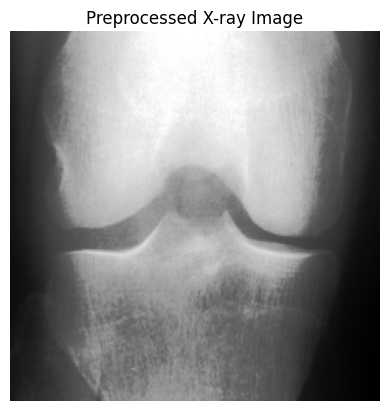

In [ ]:
# Image Preprocessing

# Function for custom preprocessing
def preprocess_xray(image_path, target_size=(224,224)):
    # 1. Read image in grayscale (X-rays are usually grayscale)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2. Resize to target size
    img = cv2.resize(img, target_size)

    # 3. Apply histogram equalization (contrast enhancement)
    img = cv2.equalizeHist(img)

    # 4. Convert to 3 channels
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # 5. Normalize pixel values to 0-1
    img = img / 255.0

    return img

# Example usage
sample_path = '/content/drive/MyDrive/XRAY/train/0/9003126R.png'  # adjust path
processed_img = preprocess_xray(sample_path)

import matplotlib.pyplot as plt
plt.imshow(processed_img)
plt.title("Preprocessed X-ray Image")
plt.axis('off')
plt.show()


# Integrate preprocessing into ImageDataGenerator

def custom_preprocessing_function(img):
    # img is a numpy array from generator
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Histogram equalization
    img = cv2.equalizeHist(np.uint8(img*255))
    # Back to 3 channels
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # Normalize
    img = img / 255.0
    return img

# Example with ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing_function,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


***🎨 Image Preprocessing and Augmentation***

Before training a deep learning model, it is important to preprocess the X-ray images to enhance relevant features and normalize inputs.

*🔹  Custom Preprocessing Function (preprocess_xray)*

- Grayscale Conversion: X-rays are typically grayscale, so we convert images to grayscale to remove unnecessary color channels.

- Resize: Images are resized to (224, 224) to match VGG16 input requirements.

- Histogram Equalization: Enhances the contrast of X-ray images to highlight important features like joint spaces and bone spurs.

- Convert to 3 Channels: VGG16 requires 3-channel input, so grayscale images are converted back to RGB format.

- Normalization: Pixel values scaled to [0, 1] for faster and stable model training.

*🔹  Visual Verification*

- A sample preprocessed image is displayed using matplotlib to ensure preprocessing is applied correctly.

*🔹  Integrating Preprocessing into ImageDataGenerator*

- custom_preprocessing_function ensures that every image generated for training goes through the same preprocessing steps automatically.

- Data augmentation is also applied:

     - Random rotations, shifts, shear, zoom, and horizontal flips

     - Helps improve model generalization by simulating variations in real X-ray images

*⚙️ Why This Step Is Important*

- Enhances contrast and features in X-ray images

- Standardizes input size and pixel range for the model

- Augments the training dataset without adding new images